In [ ]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
# 사용할 라이브러리 불러오기
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
# 데이터 읽기 함수
from keras.datasets import cifar10

def load_dataset():

  (train_X, train_y), (test_X, test_y) = cifar10.load_data()
  print(train_X.shape) # (50000, 32, 32, 3)
  print(train_y.shape) # (50000, 1)
  print(test_X.shape) # (10000, 32, 32, 3)
  print(test_y.shape) # (10000,1)
  
  for i in range(10):
    cv2_imshow(train_X[i])
  
  return (train_X, train_y), (test_X, test_y)

170508288/170498071 [==============================] - 10s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


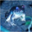

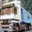

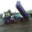

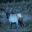

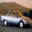

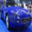

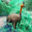

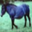

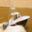

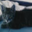

In [ ]:
(x_train, y_train), (x_test, y_test) = load_dataset()

In [ ]:
batch_size = 32
num_classes = 10
epochs = 3
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model'

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
# --------layer1
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# --------layer2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# --------layer3
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras import optimizers
from keras import optimizers
import tensorflow


opt = tensorflow.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
import torch
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    # model.fit_generator(datagen.flow(x_train, y_train,
    #                                  batch_size=batch_size),
    #                     epochs=epochs,
    #                     steps_per_epoch=1000,
    #                     validation_data=(x_test, y_test),
    #                     workers=4)
    model.fit(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=50000,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
root_dir = "/gdrive/My Drive/colab/cifar"
output_dir = os.path.join(root_dir, "output")
if not os.path.exists(output_dir):
  os.makedirs(output_dir)
model_path = os.path.join(output_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# # Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])
# torch.save(model.state_dict(), os.path.join(output_dir, "epoch_{0:d}.pt".format(epoch)))


Using real-time data augmentation.
Epoch 1/3
50000/50000 [==============================] - 1654s 33ms/step - loss: 1.0430 - accuracy: 0.6328 - val_loss: 0.7261 - val_accuracy: 0.7560
Epoch 2/3
50000/50000 [==============================] - 1639s 33ms/step - loss: 0.7965 - accuracy: 0.7306 - val_loss: 0.6884 - val_accuracy: 0.7712
Epoch 3/3
50000/50000 [==============================] - 1659s 33ms/step - loss: 0.7827 - accuracy: 0.7394 - val_loss: 0.7682 - val_accuracy: 0.7430
INFO:tensorflow:Assets written to: /gdrive/My Drive/colab/cifar/output/keras_cifar10_trained_model/assets
Saved trained model at /gdrive/My Drive/colab/cifar/output/keras_cifar10_trained_model 


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.7682 - accuracy: 0.7430
Test loss: 0.7682048082351685
Test accuracy: 0.7429999709129333


## **결론 및 느낀점**

In [ ]:
# epoch 8개 중 5개를 돌려봤을때 epoch 3부터는 유의미한 accuracy향상을 이뤄내지 못함
# 기본 cnn을 통해서는 acc 90 이상 도출해내기는 쉽지않음
# RESNET등을 이용하여 모델 향상이 필요할듯

In [ ]:
# 모델 평가 결과 계산을 위해 텐서를 리스트로 변환하는 함수
def tensor2list(input_tensor):
    return input_tensor.cpu().detach().numpy().tolist()

# 평가 수행 함수
def do_test(model, test_dataloader):

  # 평가 모드 셋팅
  model.eval()

  # Batch 별로 예측값과 정답을 저장할 리스트 초기화
  predicts, golds = [], []
  
  with torch.no_grad():

    for step, batch in enumerate(test_dataloader):
  
      # .cuda()를 통해 메모리에 업로드
      batch = tuple(t.cuda() for t in batch)

      input_features, labels = batch
      hypothesis = model(input_features)

      # ont-hot 표현으로 변경
      logits = torch.argmax(hypothesis,-1)

      x = tensor2list(logits)
      y = tensor2list(labels)

      # 예측값과 정답을 리스트에 추가
      predicts.extend(x)
      golds.extend(y)
    
    print("PRED=",predicts)
    print("GOLD=",golds)
    print("Accuracy= {0:f}\n".format(accuracy_score(golds, predicts)))

# 모델 평가 함수
def test(config):

  model = MNIST_CNN(config).cuda()

  # 저장된 모델 가중치 로드
  model.load_state_dict(torch.load(os.path.join(config["output_dir"], config["model_name"])))

  # 데이터 load
  (_, _), (features, labels) = load_dataset()
  
  test_features = TensorDataset(features, labels)
  test_dataloader = DataLoader(test_features, shuffle=True, batch_size=config["batch_size"])
  
  do_test(model, test_dataloader)

In [ ]:
# 모델 학습 함수
def train(config):

  # 모델 생성
  model = MNIST_CNN(config).cuda()

  # 데이터 읽기
  (input_features, labels), (_, _) = load_dataset()

  # TensorDataset/DataLoader를 통해 배치(batch) 단위로 데이터를 나누고 셔플(shuffle)
  train_features = TensorDataset(input_features, labels)
  train_dataloader = DataLoader(train_features, shuffle=True, batch_size=config["batch_size"])

  # 크로스엔트로피 비용 함수 
  loss_func = nn.CrossEntropyLoss()
  # 옵티마이저 함수 (역전파 알고리즘을 수행할 함수)
  optimizer = torch.optim.Adam(model.parameters(), lr=config["learn_rate"])

  for epoch in range(config["epoch"]+1):

    # 학습 모드 셋팅
    model.train()
  
    # epoch 마다 평균 비용을 저장하기 위한 리스트
    costs = []

    for (step, batch) in enumerate(train_dataloader):

      # batch = (input_features[step], labels[step])*batch_size
      # .cuda()를 통해 메모리에 업로드
      batch = tuple(t.cuda() for t in batch)

      # 각 feature 저장
      input_features, labels = batch

      # 역전파 변화도 초기화
      # .backward() 호출 시, 변화도 버퍼에 데이터가 계속 누적한 것을 초기화
      optimizer.zero_grad()

      # H(X) 계산: forward 연산
      hypothesis = model(input_features)
      # 비용 계산
      cost = loss_func(hypothesis, labels)
      # 역전파 수행
      cost.backward()
      optimizer.step()
   
      # 현재 batch의 스텝 별 loss 저장
      costs.append(cost.data.item())
    
    # 에폭마다 평균 비용 출력하고 모델을 저장
    print("Average Loss= {0:f}".format(np.mean(costs)))
    torch.save(model.state_dict(), os.path.join(config["output_dir"], "epoch_{0:d}.pt".format(epoch)))
    do_test(model, train_dataloader)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)